# VAME tutorial

In [ ]:
import vame

In [ ]:
# These paths have to be set manually
working_directory = '.'
project = 'my-vame-project'

videos = ['video-1.mp4']
poses_estimations = ['video-1.csv']

# Step 1.1: Initialize your project
config = vame.init_new_project(project=project, videos=videos, poses_estimations=poses_estimations, working_directory=working_directory, videotype='.mp4')

In [ ]:
# As our config.yaml is sometimes still changing a little due to updates, we have here a small function
# to update your config.yaml to the current state. Be aware that this will overwrite your current config.yaml
# and make sure to back up your version if you did parameter changes!
#vame.update_config(config, force_update=True)

In [ ]:
# Step 1.2: Align your behavior videos egocentric and create training dataset
# pose_ref_index: list of reference coordinate indices for alignment
# Example: 0: snout, 1: forehand_left, 2: forehand_right, 3: hindleft, 4: hindright, 5: tail
vame.egocentric_alignment(config, pose_ref_index=[0, 5])

In [ ]:
# If your experiment is by design egocentrical (e.g. head-fixed experiment on treadmill etc)
# you can use the following to convert your .csv to a .npy array, ready to train vame on it
# vame.csv_to_numpy(config)

In [ ]:
# Step 1.3: create the training set for the VAME model
vame.create_trainset(config, check_parameter=False, pose_ref_index=[0,5])

In [ ]:
# Step 2: Train VAME
vame.train_model(config)

In [ ]:
# Step 3: Evaluate model
vame.evaluate_model(config)

In [ ]:
# Step 4: Segment motifs/pose
vame.pose_segmentation(config)

---
#### The following are optional choices to create motif videos, communities/hierarchies of behavior and community videos

In [ ]:
# # OPTIONAL: Create motif videos to get insights about the fine grained poses
vame.motif_videos(config, videoType='.mp4')

In [ ]:
# # OPTIONAL: Create behavioural hierarchies via community detection
vame.community(config, show_umap=False, cut_tree=2)

In [ ]:
# # OPTIONAL: Create community videos to get insights about behavior on a hierarchical scale
vame.community_videos(config)

In [ ]:
# /home/vinicius/Documents/work/catalyst/VAME/examples/second_vame-May21-2024

In [1]:
import vame
config = '/home/vinicius/Documents/work/catalyst/VAME/examples/second_vame-May21-2024/config.yaml'

Using CUDA
GPU active: True
GPU used: NVIDIA GeForce GTX 1650


/home/vinicius/Documents/work/catalyst/VAME/venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Visualizing 29967 data points.. 


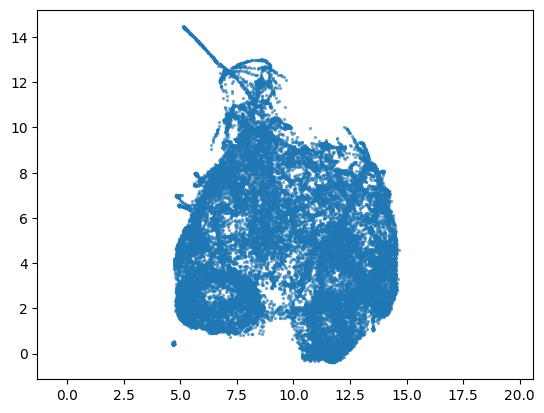

In [11]:
# # OPTIONAL: Down projection of latent vectors and visualization via UMAP
fig = vame.visualization(config, label=None) #options: label: None, "motif", "community"

In [ ]:
# # OPTIONAL: Use the generative model (reconstruction decoder) to sample from
# # the learned data distribution, reconstruct random real samples or visualize
# # the cluster center for validation
vame.generative_model(config, mode="centers") #options: mode: "sampling", "reconstruction", "centers", "motifs"

In [ ]:
# OPTIONAL: Create a video of an egocentrically aligned mouse + path through
# the community space (similar to our gif on github) to learn more about your representation
# and have something cool to show around ;)
# Note: This function is currently very slow. Once the frames are saved you can create a video
# or gif via e.g. ImageJ or other tools
vame.gif(config, pose_ref_index=[0,5], subtract_background=True, start=None,
         length=500, max_lag=30, label='community', file_format='.mp4', crop_size=(300,300))
